## Import the dataset of 4G and Full Fibre

To depict the relationship between 4G and Full Fibre connectivity with a scatter plot, 4G and Full Fibre data are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import chardet
import numpy as np
import pymongo
import folium 

In [2]:
# import 4G
df4g = pd.read_csv('data/4G_2023.csv')
df4g.head()

,laua,laua_name,AVG_4G
0,S12000033,Aberdeen City,93.60
1,S12000034,Aberdeenshire,65.64
2,E07000223,Adur,87.41
3,E07000026,Allerdale,68.39
4,E07000032,Amber Valley,87.89


In [3]:
# Extract the fixed broadband coverage dataset in 2023
# Read the CSV file into a DataFrame
df2023_fixed = pd.read_csv('2023J_TMA02_data/Ofcom_fixed/202305_fixed_laua_coverage_r02.csv', encoding='ascii')
df2023_fixed.head()


,laua,laua_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed
0,S12000033,ABERDEEN CITY,129315,129197,97.2,84.8,83.9,83.0,83.0,0.0,...,58,151,222,3130,13.2,83.9,0.0,0.1,0.2,2.4
1,S12000034,ABERDEENSHIRE,128408,128070,85.9,25.5,25.5,25.4,25.4,1.7,...,2214,3193,4296,8071,60.4,25.5,1.7,2.5,3.3,6.3
2,E07000223,ADUR,29985,29953,99.1,92.8,92.8,65.4,92.8,0.0,...,0,9,31,186,6.3,92.8,0.0,0.0,0.1,0.6
3,E07000026,ALLERDALE,52482,52364,93.1,6.0,6.0,6.0,6.0,1.2,...,617,440,422,2000,87.2,6.0,1.2,0.8,0.8,3.8
4,E07000032,AMBER VALLEY,62512,62430,97.2,62.4,60.6,59.0,59.1,0.1,...,42,115,88,1415,36.6,60.6,0.1,0.2,0.1,2.3


In [4]:
# Extract 2023 from the mobile coverage and 
#Full Fibre availability (% premises) from the fixed broadband coverage dataset. Combine two of them.

df_New2023_mobile = df4g[['laua','laua_name','AVG_4G']]

df2023_fixed = df2023_fixed[['laua','laua_name', 'Full Fibre availability (% premises)']]

display(df_New2023_mobile.head())
display(df2023_fixed.head())

,laua,laua_name,AVG_4G
0,S12000033,Aberdeen City,93.60
1,S12000034,Aberdeenshire,65.64
2,E07000223,Adur,87.41
3,E07000026,Allerdale,68.39
4,E07000032,Amber Valley,87.89


,laua,laua_name,Full Fibre availability (% premises)
0,S12000033,ABERDEEN CITY,83.0
1,S12000034,ABERDEENSHIRE,25.4
2,E07000223,ADUR,65.4
3,E07000026,ALLERDALE,6.0
4,E07000032,AMBER VALLEY,59.0


In [5]:
# Convert 'laua_name' column in df_New2023_mobile to lowercase
df_New2023_mobile.loc[:, 'laua_name'] = df_New2023_mobile['laua_name'].str.lower()

# Convert 'laua_name' column in df2023_fixed to lowercase
df2023_fixed.loc[:, 'laua_name'] = df2023_fixed['laua_name'].str.lower()

# Merge dataframes based on 'laua' and 'laua_name'
combined_df = pd.merge(df_New2023_mobile, df2023_fixed, on=['laua', 'laua_name'], how='inner')

# Display the resulting dataframe
display(combined_df.head())


,laua,laua_name,AVG_4G,Full Fibre availability (% premises)
0,S12000033,aberdeen city,93.60,83.0
1,S12000034,aberdeenshire,65.64,25.4
2,E07000223,adur,87.41,65.4
3,E07000026,allerdale,68.39,6.0
4,E07000032,amber valley,87.89,59.0


In [6]:
combined_df.shape

(374, 4)

In [7]:
# Rename the '2023' column to '4G'
combined_df.rename(columns={'AVG_4G': '4G', 'Full Fibre availability (% premises)': 'Full_Fibre'}, inplace=True)

# Display the DataFrame with the updated column name
display(combined_df.head())

,laua,laua_name,4G,Full_Fibre
0,S12000033,aberdeen city,93.60,83.0
1,S12000034,aberdeenshire,65.64,25.4
2,E07000223,adur,87.41,65.4
3,E07000026,allerdale,68.39,6.0
4,E07000032,amber valley,87.89,59.0


## Analyse the data and create the plots

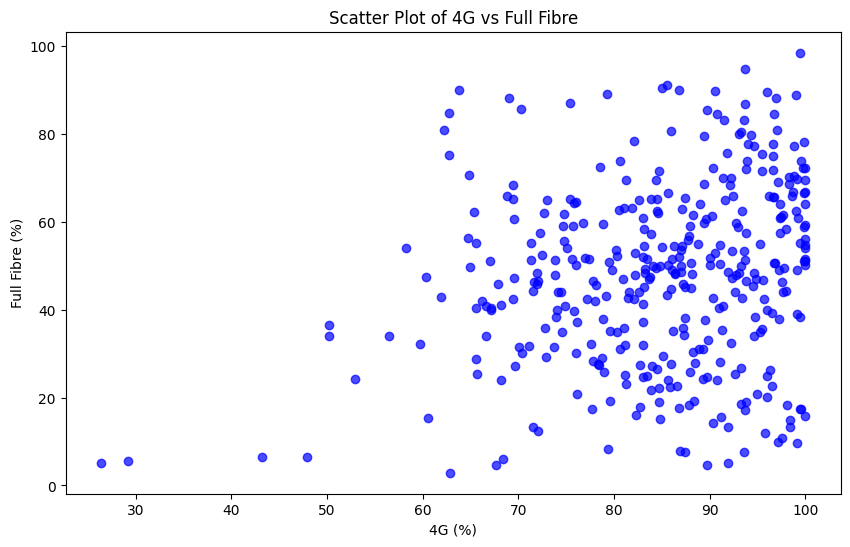

In [8]:
# Data
laua_names = combined_df['laua_name']
four_g = combined_df['4G']  
full_fibre = combined_df['Full_Fibre']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(four_g, full_fibre, color='blue', alpha=0.7)
plt.title('Scatter Plot of 4G vs Full Fibre')
plt.xlabel('4G (%)')
plt.ylabel('Full Fibre (%)')

plt.show()


## Use K-means technique and segment the group 

To analyze the connectivity between 4G and Full Fibre, data are clustered using K-means techniques.

By using statistics (percentile 25,50,75), the values to segement groups are decided.

In [9]:
# Calculate percentiles
percentiles = combined_df['4G'].quantile([0.25, 0.5, 0.75])

# Access individual percentiles
percentile_25 = percentiles[0.25]
median = percentiles[0.5]
percentile_75 = percentiles[0.75]

print("25th percentile:", percentile_25)
print("Median (50th percentile):", median)
print("75th percentile:", percentile_75)

25th percentile: 77.71
Median (50th percentile): 86.58
75th percentile: 93.75


In [10]:
# Calculate percentiles
percentiles = combined_df['Full_Fibre'].quantile([0.25, 0.5, 0.75])

# Access individual percentiles
percentile_25 = percentiles[0.25]
median = percentiles[0.5]
percentile_75 = percentiles[0.75]

print("25th percentile:", percentile_25)
print("Median (50th percentile):", median)
print("75th percentile:", percentile_75)

25th percentile: 32.175
Median (50th percentile): 48.45
75th percentile: 62.05


In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Drop rows with missing values
combined_df.dropna(inplace=True)

# Define initial centroids
initial_centroids = np.array([
    [94, 61],  # Centroid for "high"
    [87, 48],  # Centroid for "medium"
    [78, 32]   # Centroid for "low"
])



# Select features for segmentation
features = ['4G', 'Full_Fibre']
X = combined_df[features]

# Fit K-means model
k = 1  # Set k=1 for nearest neighbor
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(initial_centroids)

# Find nearest neighbors (corresponding to initial centroids)
distances, indices = knn_model.kneighbors(X)

# Assign segments based on nearest neighbors
segment_mapping = {0: 'high', 1: 'medium', 2: 'low'}
segments = [segment_mapping[idx] for idx in indices.flatten()]

# Add segment column to DataFrame
combined_df['segment'] = segments

display(combined_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


,laua,laua_name,4G,Full_Fibre,segment
0,S12000033,aberdeen city,93.60,83.0,high
1,S12000034,aberdeenshire,65.64,25.4,low
2,E07000223,adur,87.41,65.4,high
3,E07000026,allerdale,68.39,6.0,low
4,E07000032,amber valley,87.89,59.0,high
...,...,...,...,...,...
369,W06000006,wrexham,71.34,55.2,medium
370,E07000238,wychavon,83.28,48.4,medium
371,E07000128,wyre,83.07,60.8,high
372,E07000239,wyre forest,78.90,25.7,low


In [12]:
segment_counts = combined_df["segment"].value_counts()
print(segment_counts)


segment
low       132
high      121
medium    120
Name: count, dtype: int64


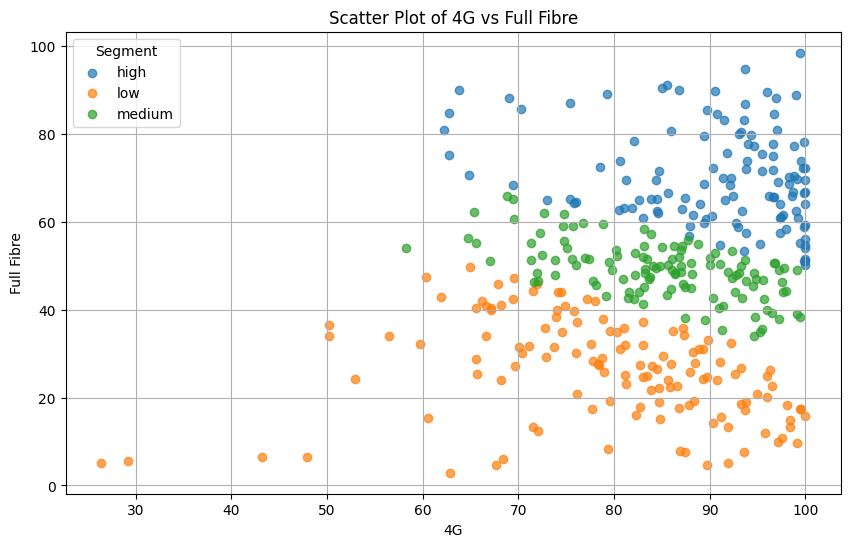

In [13]:


# Data
prem_4G = combined_df['4G']
full_fibre = combined_df['Full_Fibre']
segments = combined_df['segment']

# Scatter plot
plt.figure(figsize=(10, 6))
for segment in segments.unique():
    segment_data = combined_df[combined_df['segment'] == segment]
    plt.scatter(segment_data['4G'], segment_data['Full_Fibre'],
                label=segment, alpha=0.7)

plt.title('Scatter Plot of 4G vs Full Fibre')
plt.xlabel('4G')
plt.ylabel('Full Fibre')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


Next, this segmentation is visualised on a map to see how different the connectivity between 4G and Full Fibre in 2023 was. 

In [14]:
# Use geojson data to visualise maps
import geopandas as gpd

geojson_path = '2023J_TMA02_data/Boundaries/Local_Authority_Districts_December_2022_UK_BUC_V2_epsg4326.geojson'
geojson_data = gpd.read_file(geojson_path)


In [15]:
# Combine dfNew2023 with geojson_data

# Convert both columns to lowercase before merging
geojson_data['LAD22NM'] = geojson_data['LAD22NM'].str.lower()
combined_df['laua_name'] = combined_df['laua_name'].str.lower()

# Use .loc to avoid SettingWithCopyWarning
combined_df.loc[:, 'laua_name'] = combined_df['laua_name'].str.lower()

# Merge the DataFrames on the lowercase columns
df_combined_geo_1 = pd.merge(geojson_data, combined_df, left_on='LAD22NM', right_on='laua_name', how='right')

# Drop the temporary lowercase columns
df_combined_geo_1 = df_combined_geo_1.drop(columns=['LAD22NM'])

# Display the resulting DataFrame
display(df_combined_geo_1.head())

,FID,LAD22CD,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,laua,laua_name,4G,Full_Fibre,segment
0,339,S12000033,387763,808479,-2.20398,57.16697,bc868205-08c7-47a9-88af-6cf72d57fbc8,"MULTIPOLYGON (((-2.08032 57.09284, -2.08033 57...",S12000033,aberdeen city,93.60,83.0,high
1,340,S12000034,352284,816277,-2.79208,57.23469,e9d43203-2a53-46ca-a3a6-762a33027034,"MULTIPOLYGON (((-1.83361 57.41319, -1.83456 57...",S12000034,aberdeenshire,65.64,25.4,low
2,221,E07000223,518076,106472,-0.32417,50.84572,d56eedd2-29d2-40f8-a6b8-5f0b952ba9a4,"POLYGON ((-0.24500 50.86382, -0.21684 50.82765...",E07000223,adur,87.41,65.4,high
3,65,E07000026,317520,532997,-3.28090,54.68524,e6e9b854-1a61-4f46-928c-8ca3a83edbfc,"POLYGON ((-3.11902 54.92621, -3.12636 54.90550...",E07000026,allerdale,68.39,6.0,low
4,71,E07000032,436166,348084,-1.46219,53.02884,2ff039cf-0a31-4ac2-a02a-beca575e827c,"POLYGON ((-1.37365 53.10784, -1.36074 53.09038...",E07000032,amber valley,87.89,59.0,high


In [16]:
# Mapping dictionary
segment_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}

# Create 'segment_2' column based on the 'segment' column
df_combined_geo_1['segment_2'] = df_combined_geo_1['segment'].map(segment_mapping)

# Display the updated DataFrame
display(df_combined_geo_1.head())


,FID,LAD22CD,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,laua,laua_name,4G,Full_Fibre,segment,segment_2
0,339,S12000033,387763,808479,-2.20398,57.16697,bc868205-08c7-47a9-88af-6cf72d57fbc8,"MULTIPOLYGON (((-2.08032 57.09284, -2.08033 57...",S12000033,aberdeen city,93.60,83.0,high,3
1,340,S12000034,352284,816277,-2.79208,57.23469,e9d43203-2a53-46ca-a3a6-762a33027034,"MULTIPOLYGON (((-1.83361 57.41319, -1.83456 57...",S12000034,aberdeenshire,65.64,25.4,low,1
2,221,E07000223,518076,106472,-0.32417,50.84572,d56eedd2-29d2-40f8-a6b8-5f0b952ba9a4,"POLYGON ((-0.24500 50.86382, -0.21684 50.82765...",E07000223,adur,87.41,65.4,high,3
3,65,E07000026,317520,532997,-3.28090,54.68524,e6e9b854-1a61-4f46-928c-8ca3a83edbfc,"POLYGON ((-3.11902 54.92621, -3.12636 54.90550...",E07000026,allerdale,68.39,6.0,low,1
4,71,E07000032,436166,348084,-1.46219,53.02884,2ff039cf-0a31-4ac2-a02a-beca575e827c,"POLYGON ((-1.37365 53.10784, -1.36074 53.09038...",E07000032,amber valley,87.89,59.0,high,3


In [17]:
#Check the null values
df_combined_geo_1.isnull().sum()

FID           0
LAD22CD       0
BNG_E         0
BNG_N         0
LONG          0
LAT           0
GlobalID      0
geometry      0
laua          0
laua_name     0
4G            0
Full_Fibre    0
segment       0
segment_2     0
dtype: int64

In [18]:

gdf = gpd.GeoDataFrame(df_combined_geo_1, geometry='geometry')

# Create a base map
m = folium.Map(location=[54.5, -2], zoom_start=6)  # Centered on the UK

# Define a function to get the color for each segment
def get_color(segment):
    if segment == 1:
        return 'blue'
    elif segment == 2:
        return 'green'
    elif segment == 3:
        return 'red'
    else:
        return 'gray'

# Add GeoJSON to the map
folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['segment_2']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    }
).add_to(m)

# Add a legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height: 100px; 
            border:2px solid grey; z-index:9999; font-size:14px;">
    &nbsp; <b>Segments</b> <br>
    &nbsp; Low &nbsp; <i class="fa fa-square" style="color:blue"></i><br>
    &nbsp; Medium &nbsp; <i class="fa fa-square" style="color:green"></i><br>
    &nbsp; High &nbsp; <i class="fa fa-square" style="color:red"></i><br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m


Northern Ireland made significant contributions to the advancement of 4G and full-fibre networks, with all areas categorised as highly advanced. Similarly, regions with large cities, such as London, also exhibited high performance in both areas. In contrast, Scotland showed comparatively lower performance in these advancements.

### Add the information about nation

The investigation into whether there are any patterns by nation in the association between 4G and Full Fibre is conducted by visualising a scatter plot with the legend indicating the nation. 

In [19]:
# Add the information of nations
# Mapping dictionary for LAD22CD to nation
lad_to_nation = {
    'E': 'England',
    'N': 'Northern Ireland',
    'S': 'Scotland',
    'W': 'Wales'
}

# Create a new 'nation' column based on 'LAD22CD'
geojson_data['nation'] = geojson_data['LAD22CD'].str[0].map(lad_to_nation)

# Print the updated DataFrame
print(geojson_data[['LAD22CD', 'nation']])

       LAD22CD   nation
0    E06000001  England
1    E06000002  England
2    E06000003  England
3    E06000004  England
4    E06000005  England
..         ...      ...
369  W06000020    Wales
370  W06000021    Wales
371  W06000022    Wales
372  W06000023    Wales
373  W06000024    Wales

[374 rows x 2 columns]


In [20]:
geojson_data_1 = geojson_data[['LAD22CD', 'nation']]
display(geojson_data_1)

,LAD22CD,nation
0,E06000001,England
1,E06000002,England
2,E06000003,England
3,E06000004,England
4,E06000005,England
...,...,...
369,W06000020,Wales
370,W06000021,Wales
371,W06000022,Wales
372,W06000023,Wales


In [21]:
# Merging merged_df and geojson_data_1 on 'laua' and 'LAD22CD'
merged_nation = pd.merge(df_combined_geo_1, geojson_data_1, left_on='laua', right_on='LAD22CD')

display(merged_nation.head())

,FID,LAD22CD_x,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,laua,laua_name,4G,Full_Fibre,segment,segment_2,LAD22CD_y,nation
0,339,S12000033,387763,808479,-2.20398,57.16697,bc868205-08c7-47a9-88af-6cf72d57fbc8,"MULTIPOLYGON (((-2.08032 57.09284, -2.08033 57...",S12000033,aberdeen city,93.60,83.0,high,3,S12000033,Scotland
1,340,S12000034,352284,816277,-2.79208,57.23469,e9d43203-2a53-46ca-a3a6-762a33027034,"MULTIPOLYGON (((-1.83361 57.41319, -1.83456 57...",S12000034,aberdeenshire,65.64,25.4,low,1,S12000034,Scotland
2,221,E07000223,518076,106472,-0.32417,50.84572,d56eedd2-29d2-40f8-a6b8-5f0b952ba9a4,"POLYGON ((-0.24500 50.86382, -0.21684 50.82765...",E07000223,adur,87.41,65.4,high,3,E07000223,England
3,65,E07000026,317520,532997,-3.28090,54.68524,e6e9b854-1a61-4f46-928c-8ca3a83edbfc,"POLYGON ((-3.11902 54.92621, -3.12636 54.90550...",E07000026,allerdale,68.39,6.0,low,1,E07000026,England
4,71,E07000032,436166,348084,-1.46219,53.02884,2ff039cf-0a31-4ac2-a02a-beca575e827c,"POLYGON ((-1.37365 53.10784, -1.36074 53.09038...",E07000032,amber valley,87.89,59.0,high,3,E07000032,England


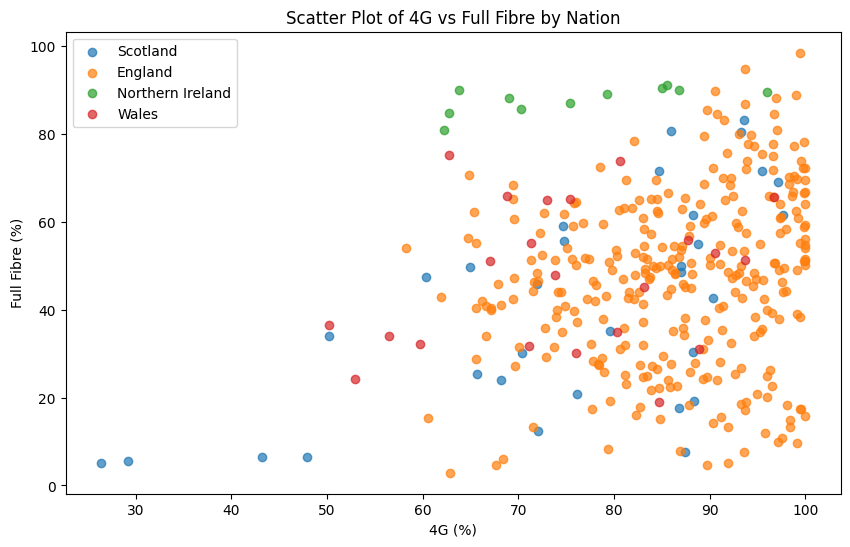

In [22]:
# Data
laua_names = merged_nation['laua_name']
four_g = merged_nation['4G']
full_fibre = merged_nation['Full_Fibre']
nations = merged_nation['nation']

# Scatter plot
plt.figure(figsize=(10, 6))
for nation in nations.unique():
    plt.scatter(four_g[nations == nation], full_fibre[nations == nation], label=nation, alpha=0.7)

# Set plot title and labels
plt.title('Scatter Plot of 4G vs Full Fibre by Nation')
plt.xlabel('4G (%)')
plt.ylabel('Full Fibre (%)')

# Add legend
plt.legend()

plt.show()



It is noticeable that all areas of Northern Ireland have high performance in full-fibre connectivity, with varying levels of 4G advancement. In contrast, some areas of Scotland show significantly lower performance in both full-fibre and 4G. In England and Wales, 4G coverage is relatively high (over 60%), but full-fibre availability varies widely, ranging from 0 to 100%.

## 4G and Full Fibre For 5 years 

The advancement of 4G and Full Fibre by nation for 5 years is investigated.

In [23]:
MONGO_CONNECTION_STRING = f"mongodb://localhost:27017/"

In [24]:
from pymongo import MongoClient
mongo_client = MongoClient(MONGO_CONNECTION_STRING)
DB_NAME = "Q1_TMA02_TM351"  
print(f"DB_NAME = {DB_NAME}")

mongo_db = mongo_client[DB_NAME]

DB_NAME = Q1_TMA02_TM351


In [25]:
import geopandas as gpd

geojson_path = '2023J_TMA02_data/Boundaries/Local_Authority_Districts_December_2022_UK_BUC_V2_epsg4326.geojson'
geojson_data = gpd.read_file(geojson_path)

In [26]:
from pymongo import MongoClient
import pandas as pd

# Connect to MongoDB
MONGO_CONNECTION_STRING = "mongodb://localhost:27017/"
mongo_client = MongoClient(MONGO_CONNECTION_STRING)
DB_NAME = "Q1_TMA02_TM351"
mongo_db = mongo_client[DB_NAME]

# List collections
collections = mongo_db.list_collection_names()
print(f"Collections in database '{DB_NAME}': {collections}")

# Initialize an empty DataFrame to hold combined data
df_combined = pd.DataFrame()

# Loop through the actual collection names
for collection_name in collections:
    # Fetch data from MongoDB for the specified collection
    data = list(mongo_db[collection_name].find({}, {'_id': 0, 'laua': 1, 'laua_name': 1, 'Full Fibre availability (% premises)': 1, 'year': 1}))
    
    # Check if there is data in the collection
    if data:
        # Add the data to the DataFrame
        df_combined = pd.concat([df_combined, pd.DataFrame(data)])
    else:
        print(f"No data found in collection: {collection_name}")

# Display the combined DataFrame
display(df_combined)



Collections in database 'Q1_TMA02_TM351': ['data_2019', 'data_2020', 'data_2023', 'data_2021', 'data_2022']


,laua,laua_name,Full Fibre availability (% premises),year
0,S12000033,ABERDEEN CITY,13.1,2019
1,S12000034,ABERDEENSHIRE,2.7,2019
2,E07000223,ADUR,0.6,2019
3,E07000026,ALLERDALE,1.7,2019
4,E07000032,AMBER VALLEY,22.1,2019
...,...,...,...,...
369,W06000006,WREXHAM,47.6,2022
370,E07000238,WYCHAVON,29.4,2022
371,E07000128,WYRE,60.2,2022
372,E07000239,WYRE FOREST,10.3,2022


In [27]:
# chack the number of rows by year
df_combined['year'].value_counts()

year
2019    382
2020    379
2023    374
2021    374
2022    374
Name: count, dtype: int64

### Add the information about nation

In [28]:
# Mapping dictionary for LAD22CD to nation
lad_to_nation = {
    'E': 'England',
    'N': 'Northern Ireland',
    'S': 'Scotland',
    'W': 'Wales'
}

# Create a new 'nation' column based on 'LAD22CD'
geojson_data['nation'] = geojson_data['LAD22CD'].str[0].map(lad_to_nation)

# Print the updated DataFrame
print(geojson_data[['LAD22CD', 'nation']])

       LAD22CD   nation
0    E06000001  England
1    E06000002  England
2    E06000003  England
3    E06000004  England
4    E06000005  England
..         ...      ...
369  W06000020    Wales
370  W06000021    Wales
371  W06000022    Wales
372  W06000023    Wales
373  W06000024    Wales

[374 rows x 2 columns]


In [29]:
geojson_data_1 = geojson_data[['LAD22CD', 'nation']]
display(geojson_data_1)

,LAD22CD,nation
0,E06000001,England
1,E06000002,England
2,E06000003,England
3,E06000004,England
4,E06000005,England
...,...,...
369,W06000020,Wales
370,W06000021,Wales
371,W06000022,Wales
372,W06000023,Wales


In [30]:
# Merging merged_df and geojson_data_1 on 'laua' and 'LAD22CD'
full_fibre = pd.merge(df_combined, geojson_data_1, left_on='laua', right_on='LAD22CD')

display(full_fibre)

,laua,laua_name,Full Fibre availability (% premises),year,LAD22CD,nation
0,S12000033,ABERDEEN CITY,13.1,2019,S12000033,Scotland
1,S12000033,ABERDEEN CITY,34.9,2020,S12000033,Scotland
2,S12000033,ABERDEEN CITY,83.0,2023,S12000033,Scotland
3,S12000033,ABERDEEN CITY,58.4,2021,S12000033,Scotland
4,S12000033,ABERDEEN CITY,74.4,2022,S12000033,Scotland
...,...,...,...,...,...,...
1860,E06000061,NORTH NORTHAMPTONSHIRE,21.6,2021,E06000061,England
1861,E06000061,NORTH NORTHAMPTONSHIRE,34.8,2022,E06000061,England
1862,E06000062,WEST NORTHAMPTONSHIRE,85.3,2023,E06000062,England
1863,E06000062,WEST NORTHAMPTONSHIRE,41.5,2021,E06000062,England


### Create the data by nation

In [31]:
# Group by 'nation' and 'year' and calculate the mean of 'Full Fibre availability (% premises)'
grouped_data = full_fibre.groupby(['nation', 'year'])['Full Fibre availability (% premises)'].mean().round(2).reset_index()

# Display the grouped data
display(grouped_data)


,nation,year,Full Fibre availability (% premises)
0,England,2019,8.10
1,England,2020,13.71
2,England,2021,22.57
3,England,2022,37.15
4,England,2023,46.90
5,Northern Ireland,2019,26.37
6,Northern Ireland,2020,50.79
7,Northern Ireland,2021,66.85
8,Northern Ireland,2022,82.70
9,Northern Ireland,2023,87.82


In [32]:
grouped_data = grouped_data.rename(columns={'Full Fibre availability (% premises)': 'Full_Fibre'})

# Display the grouped data
display(grouped_data)

,nation,year,Full_Fibre
0,England,2019,8.10
1,England,2020,13.71
2,England,2021,22.57
3,England,2022,37.15
4,England,2023,46.90
5,Northern Ireland,2019,26.37
6,Northern Ireland,2020,50.79
7,Northern Ireland,2021,66.85
8,Northern Ireland,2022,82.70
9,Northern Ireland,2023,87.82


In [33]:
# Load the data 
nation_4G = pd.read_csv('data/4G_nation.csv')
nation_4G.head()

,nation,2019,2020,2021,2022,2023
0,England,78.22,82.72,83.69,85.29,86.37
1,Northern Ireland,69.45,74.12,74.48,78.49,79.36
2,Scotland,67.47,74.24,75.13,76.92,78.04
3,Wales,65.50,72.31,73.10,73.93,75.57


In [34]:
# Reshape the DataFrame using melt
melted_data = nation_4G.melt(id_vars='nation', var_name='year', value_name='4G')

# Display the reshaped DataFrame
display(melted_data)

,nation,year,4G
0,England,2019,78.22
1,Northern Ireland,2019,69.45
2,Scotland,2019,67.47
3,Wales,2019,65.50
4,England,2020,82.72
5,Northern Ireland,2020,74.12
6,Scotland,2020,74.24
7,Wales,2020,72.31
8,England,2021,83.69
9,Northern Ireland,2021,74.48


In [35]:
# Check the type
melted_data.dtypes

nation     object
year       object
4G        float64
dtype: object

In [36]:
# Year has to be integer. Therefore, Convert the 'year' column to int64
melted_data['year'] = melted_data['year'].astype('int64')

# Display the updated melted_data DataFrame
display(melted_data)


,nation,year,4G
0,England,2019,78.22
1,Northern Ireland,2019,69.45
2,Scotland,2019,67.47
3,Wales,2019,65.50
4,England,2020,82.72
5,Northern Ireland,2020,74.12
6,Scotland,2020,74.24
7,Wales,2020,72.31
8,England,2021,83.69
9,Northern Ireland,2021,74.48


In [37]:
# Merge grouped_data and melted_data on 'nation' and 'year'
merge_df = pd.merge(grouped_data, melted_data, on=['nation', 'year'])

# Display the merged DataFrame
display(merge_df)

,nation,year,Full_Fibre,4G
0,England,2019,8.10,78.22
1,England,2020,13.71,82.72
2,England,2021,22.57,83.69
3,England,2022,37.15,85.29
4,England,2023,46.90,86.37
5,Northern Ireland,2019,26.37,69.45
6,Northern Ireland,2020,50.79,74.12
7,Northern Ireland,2021,66.85,74.48
8,Northern Ireland,2022,82.70,78.49
9,Northern Ireland,2023,87.82,79.36


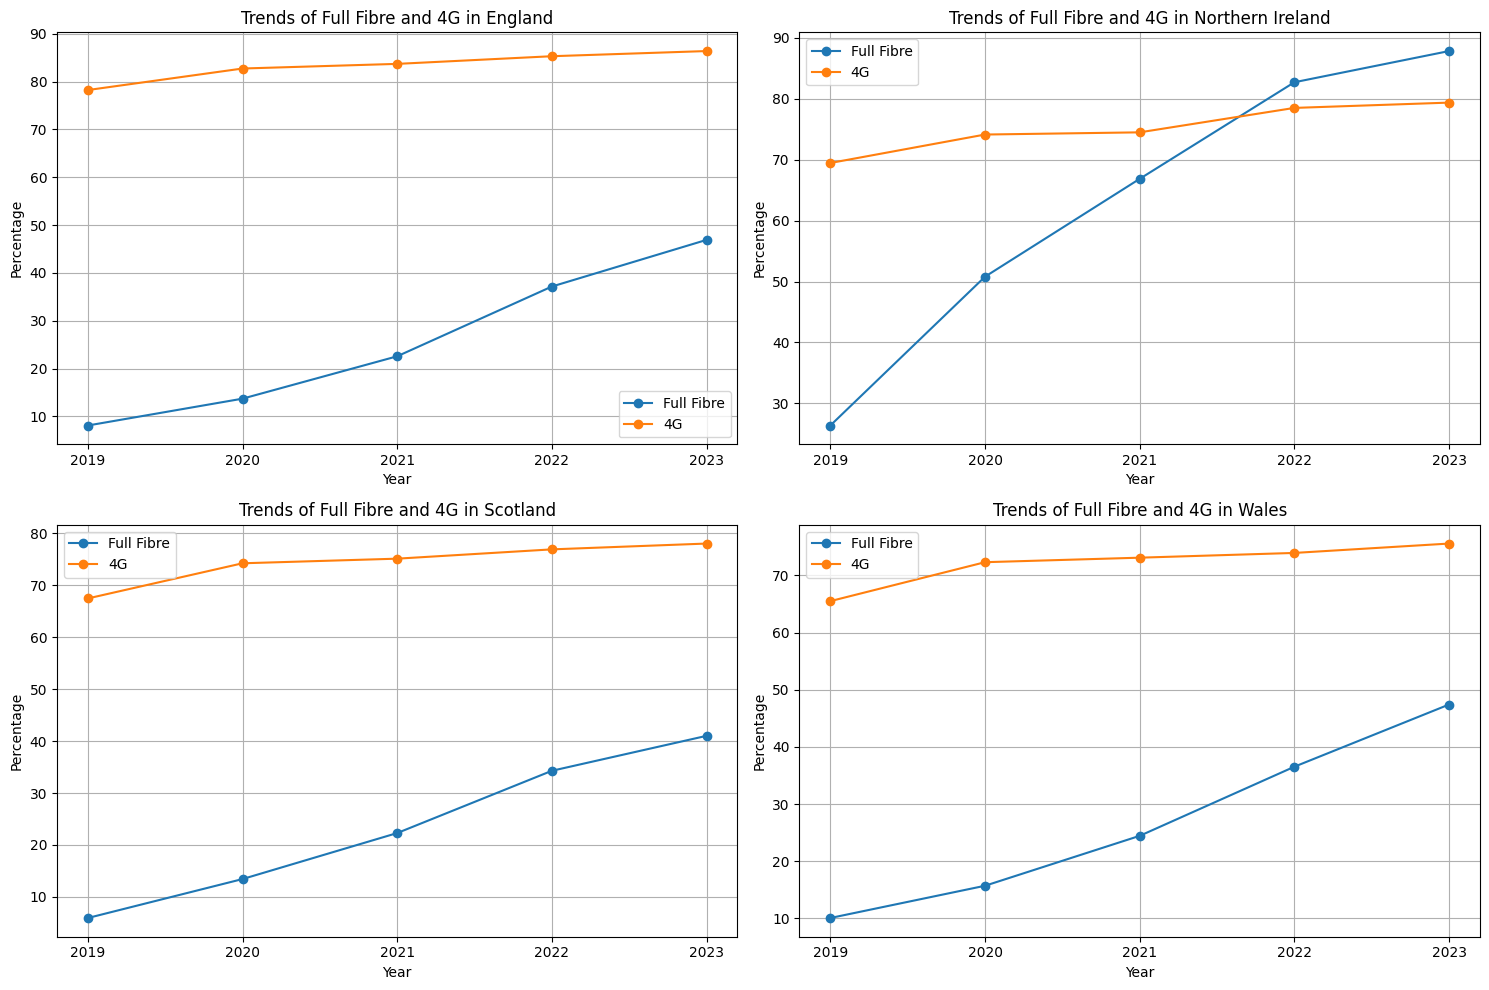

In [38]:
# Get unique nations
unique_nations = merge_df['nation'].unique()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over each nation and create a separate bar chart
for i, nation in enumerate(unique_nations):
    ax = axs[i // 2, i % 2]
    nation_data = merge_df[merge_df['nation'] == nation]
    ax.plot(nation_data['year'], nation_data['Full_Fibre'], marker='o', label='Full Fibre')
    ax.plot(nation_data['year'], nation_data['4G'], marker='o', label='4G')
    ax.set_title(f'Trends of Full Fibre and 4G in {nation}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_xticks(nation_data['year'])
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Except for Northern Ireland, similar trends were observed over the five-year period for all nations. 4G availability consistently contributed over 65%, showing a gradual increase each year. In contrast, Full Fibre availability in Northern Ireland experienced a dramatic rise, surpassing 4G percentages in 2022 and nearly reaching 90% by 2023. However, other nations saw slower growth in Full Fibre adoption, starting around 10% in 2019 and not reaching 50% by 2023.

In [39]:
# save the data 
#merge_df.to_csv('4g_full_fibre_nation.csv', index=False)